In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/HPQ_Updated.csv")

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df.sort_values(by='date', inplace=True)

In [ ]:
df.head()

,Unnamed: 0,date,volume,close,close_diff,MFI,RSI_14,Trading_Signal_Buy,Trading_Signal_Hold,Trading_Signal_Sell
12725,12725,1970-01-02,1324700,0.363217,-0.010644,37.292031,27.200010,0,0,1
12724,12724,1970-01-05,4368700,0.373861,0.003991,41.226146,42.241388,1,0,0
12723,12723,1970-01-06,2395700,0.369870,-0.000887,49.430646,44.166642,0,0,1
12722,12722,1970-01-07,1014600,0.370757,-0.003548,54.852328,51.492536,1,0,0
12721,12721,1970-01-08,3325900,0.374305,-0.003548,65.599820,58.088256,1,0,0


In [ ]:

train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

In [ ]:
close_df=df[['date','close']]


In [ ]:
close_df.set_index('date', inplace=True)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

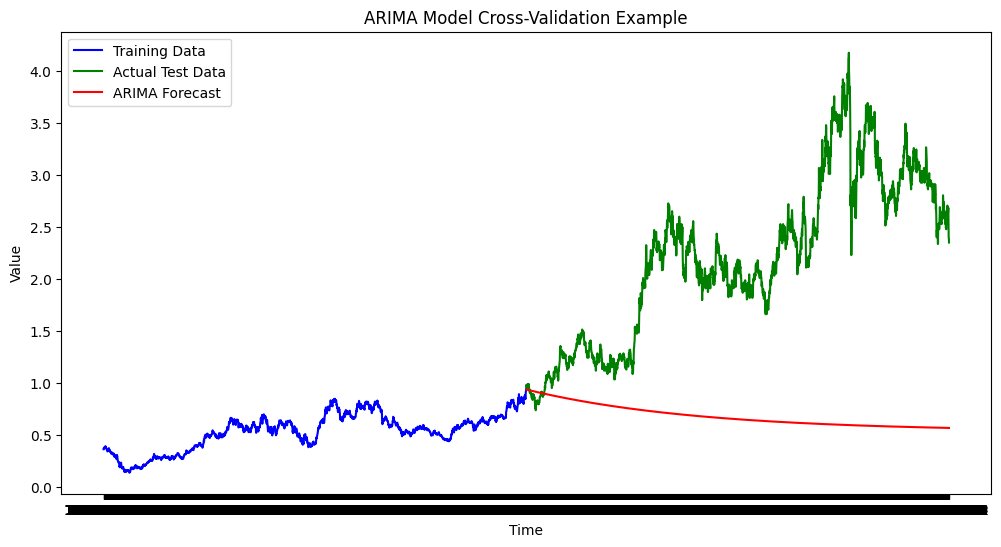

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

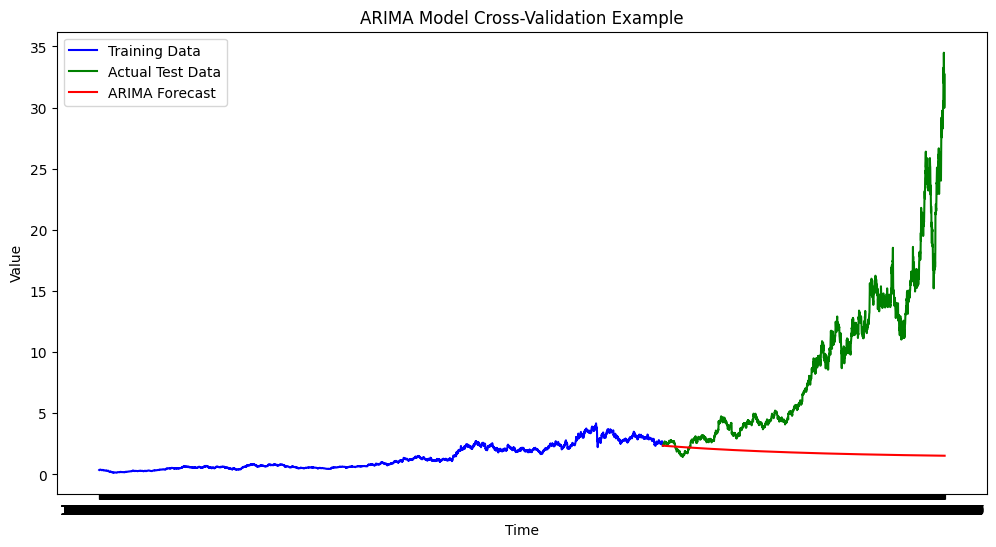

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

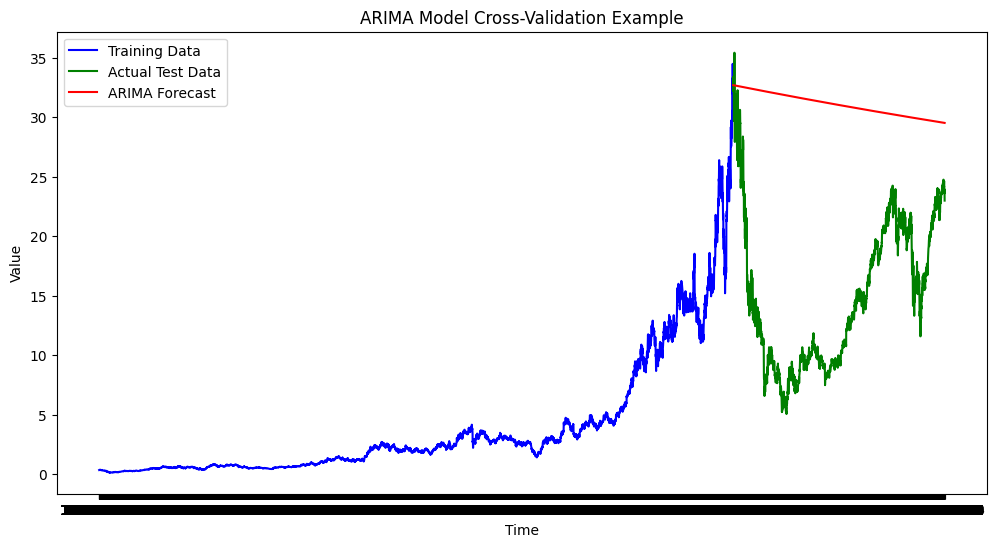

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

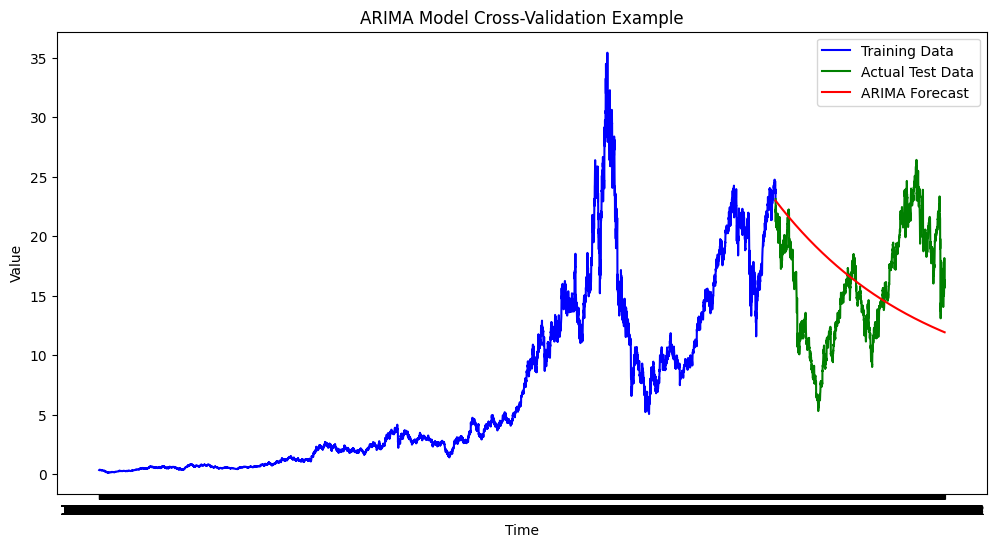

Mean MSE: 110.52195993380465


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error




n_splits = 4


tscv = TimeSeriesSplit(n_splits=n_splits)


p, d, q = 1, 0, 0


mse_scores = []

for f_index in range(0,len(list(tscv.split(close_df)))):
  fold_index = f_index
  train_index, test_index = list(tscv.split(close_df))[fold_index]
  train_data = close_df.iloc[train_index]
  test_data = close_df.iloc[test_index]

  model = ARIMA(train_data, order=(p, d, q))
  model_fit = model.fit()
  forecast = model_fit.forecast(steps=len(test_data))

  mse = mean_squared_error(test_data, forecast)
  mse_scores.append(mse)

  plt.figure(figsize=(12, 6))
  plt.plot(train_data.index, train_data.values, label="Training Data", color="blue")
  plt.plot(test_data.index, test_data.values, label="Actual Test Data", color="green")
  plt.plot(test_data.index, forecast, label="ARIMA Forecast", color="red")
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.title("ARIMA Model Cross-Validation Example")
  plt.legend()
  plt.show()
mean_mse = np.mean(mse_scores)


print(f"Mean MSE: {mean_mse}")


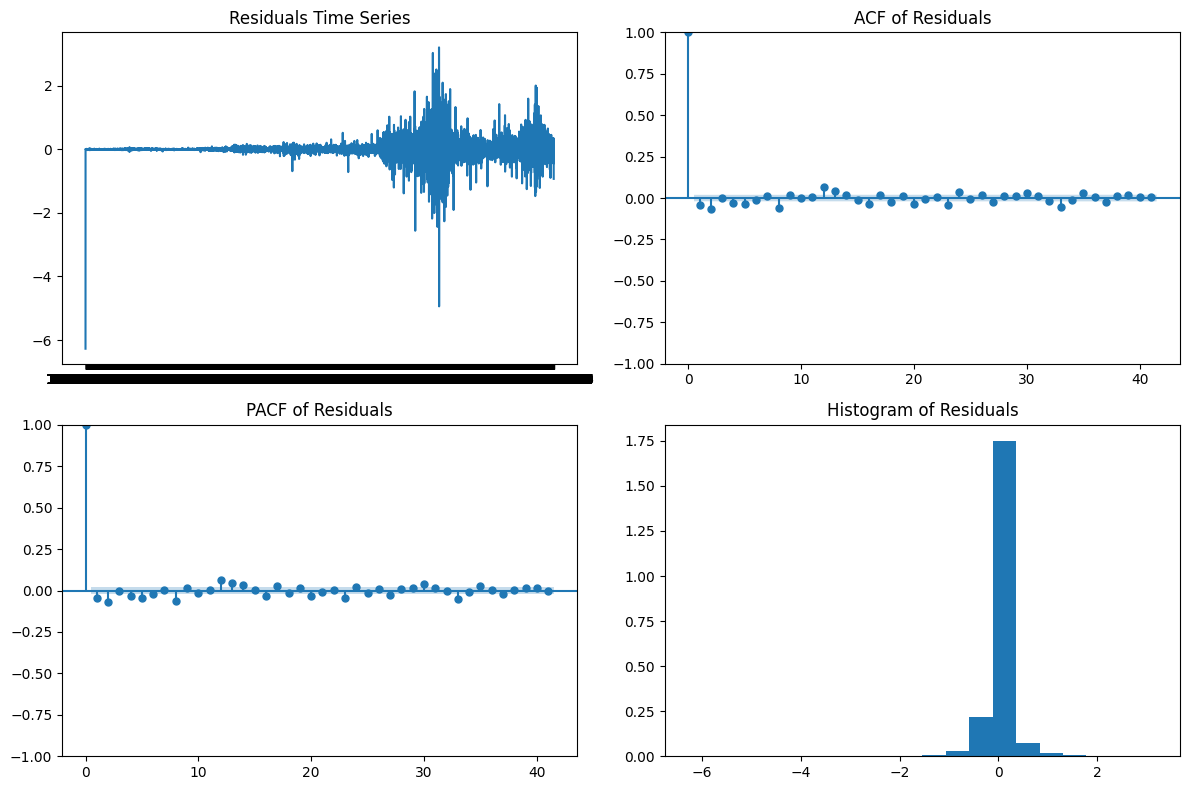

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf





residuals = model_fit.resid


plt.figure(figsize=(12, 8))


plt.subplot(221)
plt.plot(residuals)
plt.title('Residuals Time Series')


plt.subplot(222)
plot_acf(residuals, ax=plt.gca(), title='ACF of Residuals')


plt.subplot(223)
plot_pacf(residuals, ax=plt.gca(), title='PACF of Residuals')


plt.subplot(224)
plt.hist(residuals, bins=20, density=True)
plt.title('Histogram of Residuals')
plt.tight_layout()

plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth

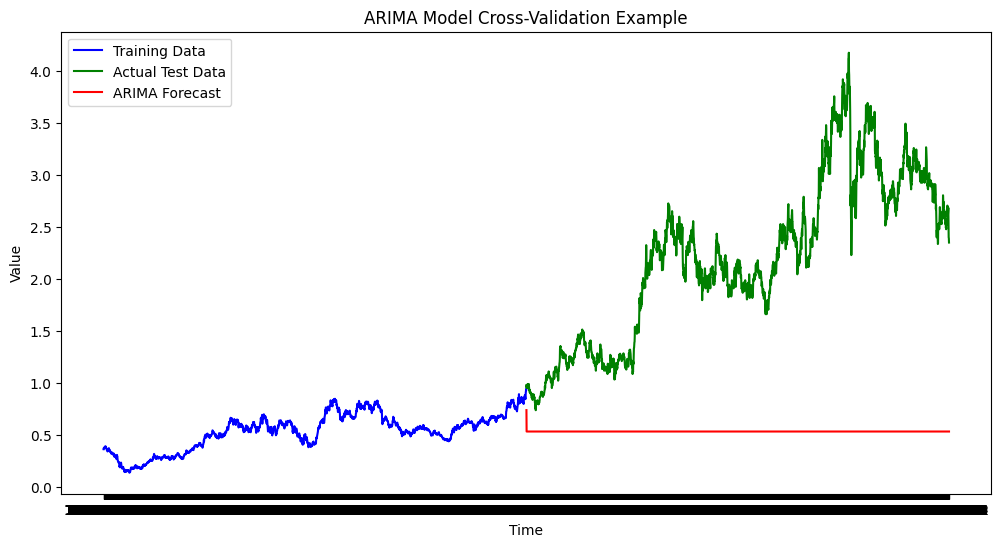

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth

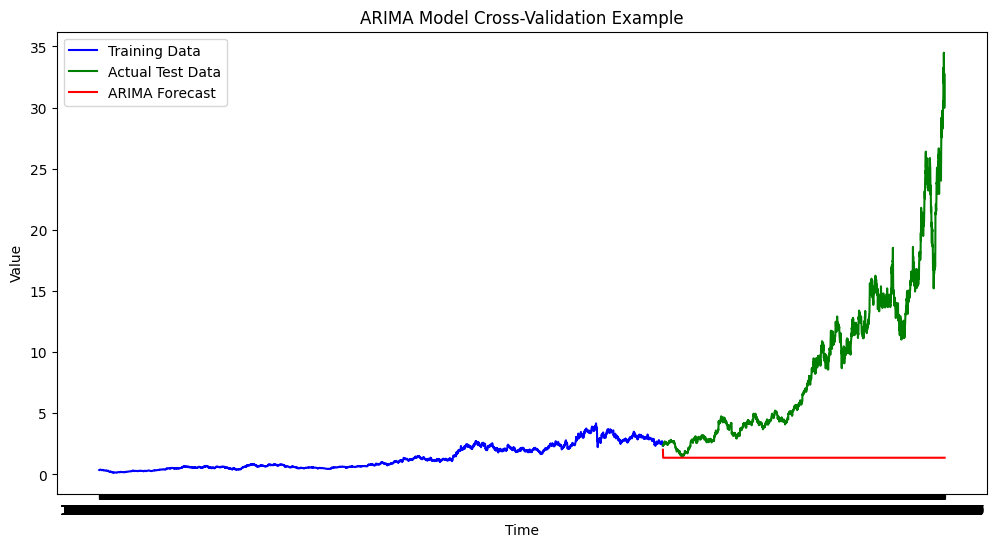

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

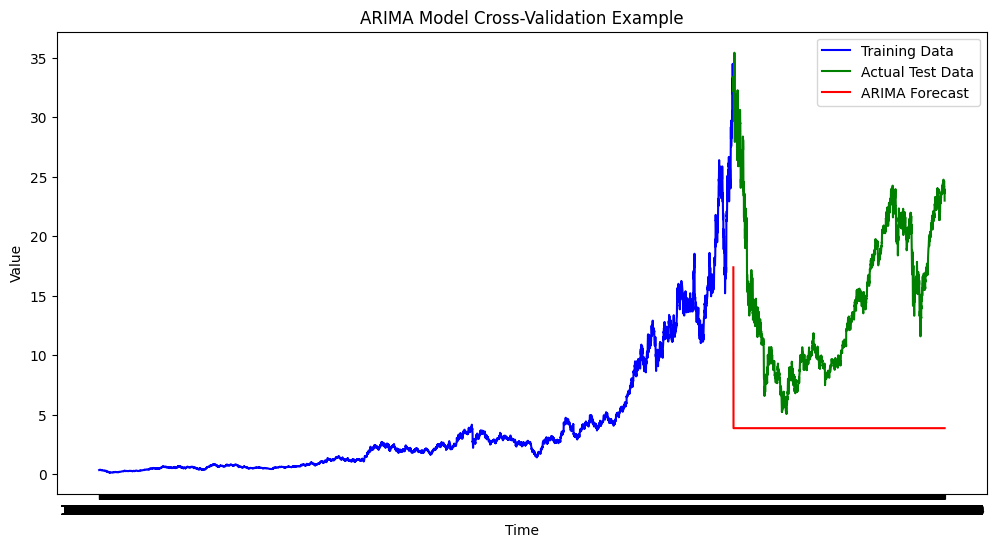

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

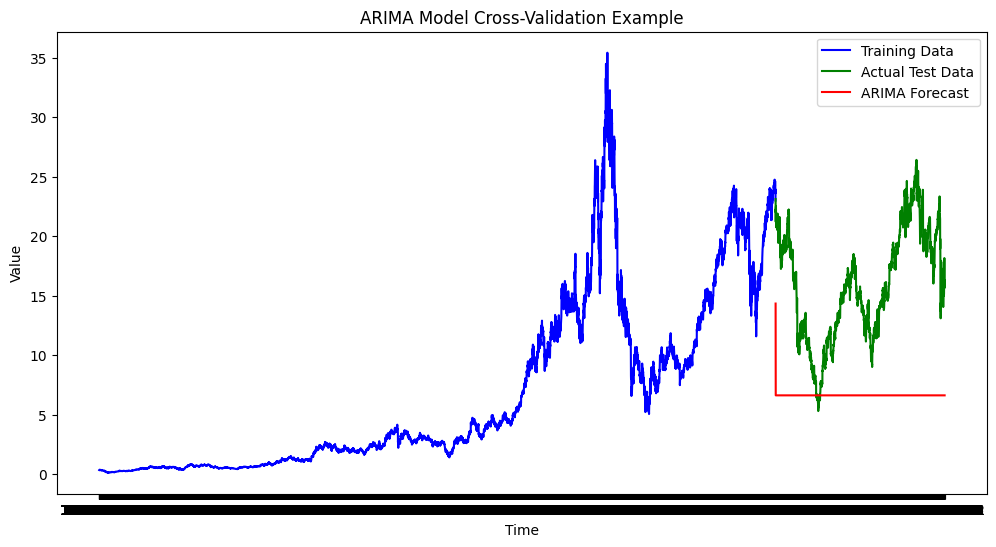

Mean MSE: 91.71695521656534


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error


n_splits = 4


tscv = TimeSeriesSplit(n_splits=n_splits)


p, d, q = 0, 0, 1


mse_scores = []

for f_index in range(0,len(list(tscv.split(close_df)))):
  fold_index = f_index
  train_index, test_index = list(tscv.split(close_df))[fold_index]
  train_data = close_df.iloc[train_index]
  test_data = close_df.iloc[test_index]

  model = ARIMA(train_data, order=(p, d, q))
  model_fit = model.fit()
  forecast = model_fit.forecast(steps=len(test_data))

  mse = mean_squared_error(test_data, forecast)
  mse_scores.append(mse)

  plt.figure(figsize=(12, 6))
  plt.plot(train_data.index, train_data.values, label="Training Data", color="blue")
  plt.plot(test_data.index, test_data.values, label="Actual Test Data", color="green")
  plt.plot(test_data.index, forecast, label="ARIMA Forecast", color="red")
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.title("ARIMA Model Cross-Validation Example")
  plt.legend()
  plt.show()
mean_mse = np.mean(mse_scores)


print(f"Mean MSE: {mean_mse}")

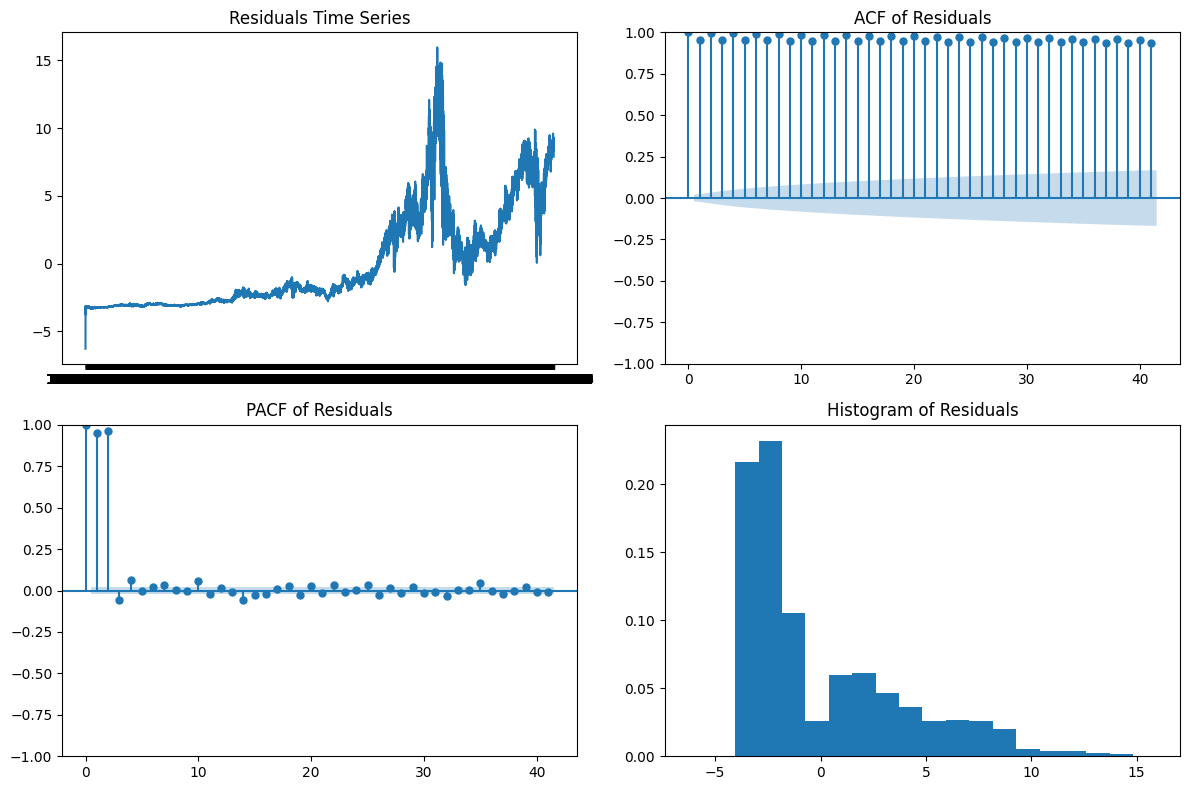

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

residuals = model_fit.resid


plt.figure(figsize=(12, 8))


plt.subplot(221)
plt.plot(residuals)
plt.title('Residuals Time Series')


plt.subplot(222)
plot_acf(residuals, ax=plt.gca(), title='ACF of Residuals')


plt.subplot(223)
plot_pacf(residuals, ax=plt.gca(), title='PACF of Residuals')


plt.subplot(224)
plt.hist(residuals, bins=20, density=True)
plt.title('Histogram of Residuals')
plt.tight_layout()

plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

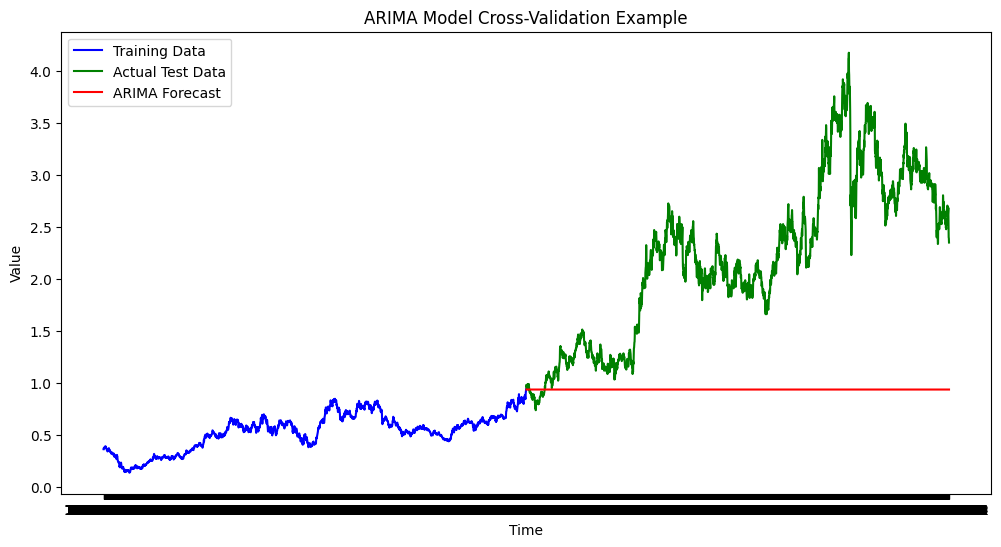

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

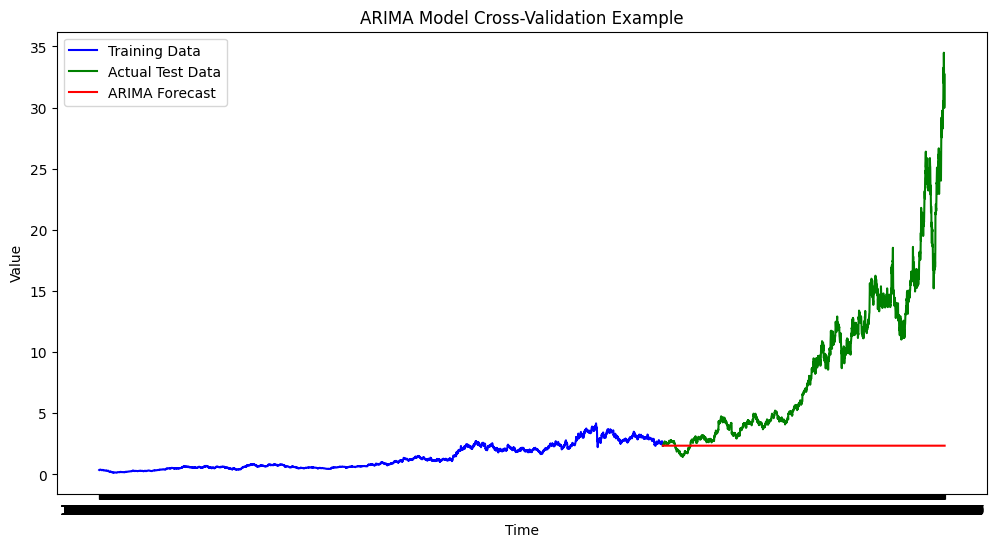

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

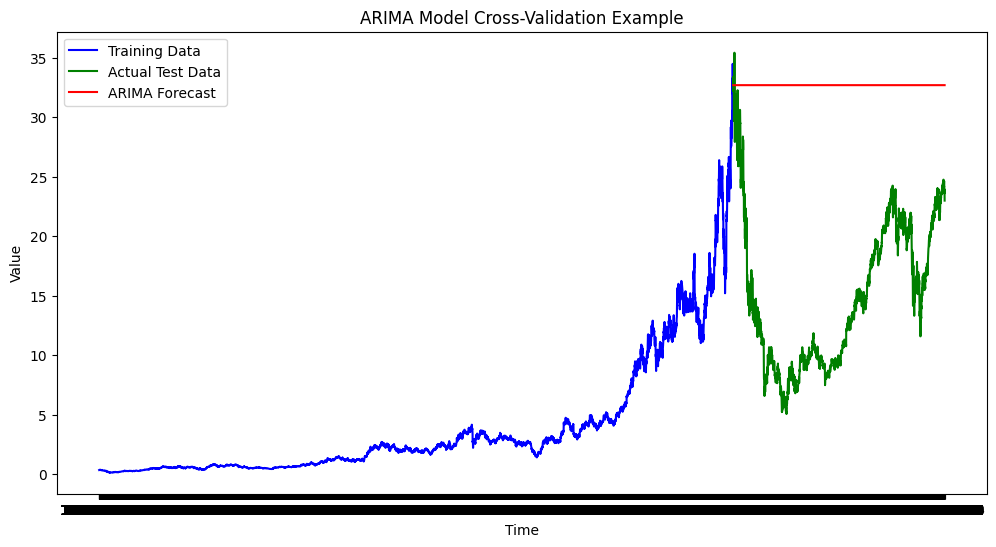

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

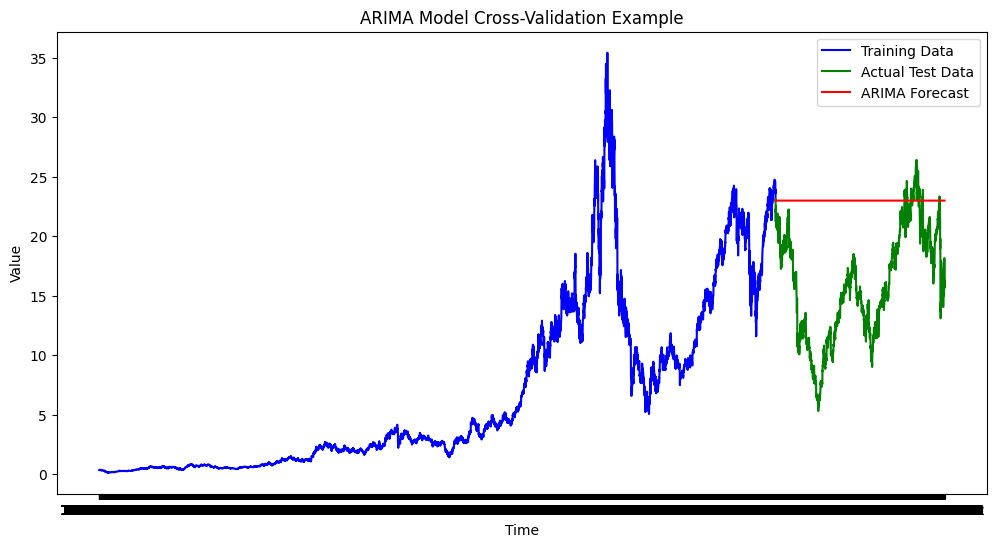

Mean MSE: 127.61890677984891


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error


n_splits = 4


tscv = TimeSeriesSplit(n_splits=n_splits)


p, d, q = 0, 1, 0


mse_scores = []

for f_index in range(0,len(list(tscv.split(close_df)))):
  fold_index = f_index
  train_index, test_index = list(tscv.split(close_df))[fold_index]
  train_data = close_df.iloc[train_index]
  test_data = close_df.iloc[test_index]

  model = ARIMA(train_data, order=(p, d, q))
  model_fit = model.fit()
  forecast = model_fit.forecast(steps=len(test_data))

  mse = mean_squared_error(test_data, forecast)
  mse_scores.append(mse)

  plt.figure(figsize=(12, 6))
  plt.plot(train_data.index, train_data.values, label="Training Data", color="blue")
  plt.plot(test_data.index, test_data.values, label="Actual Test Data", color="green")
  plt.plot(test_data.index, forecast, label="ARIMA Forecast", color="red")
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.title("ARIMA Model Cross-Validation Example")
  plt.legend()
  plt.show()
mean_mse = np.mean(mse_scores)


print(f"Mean MSE: {mean_mse}")


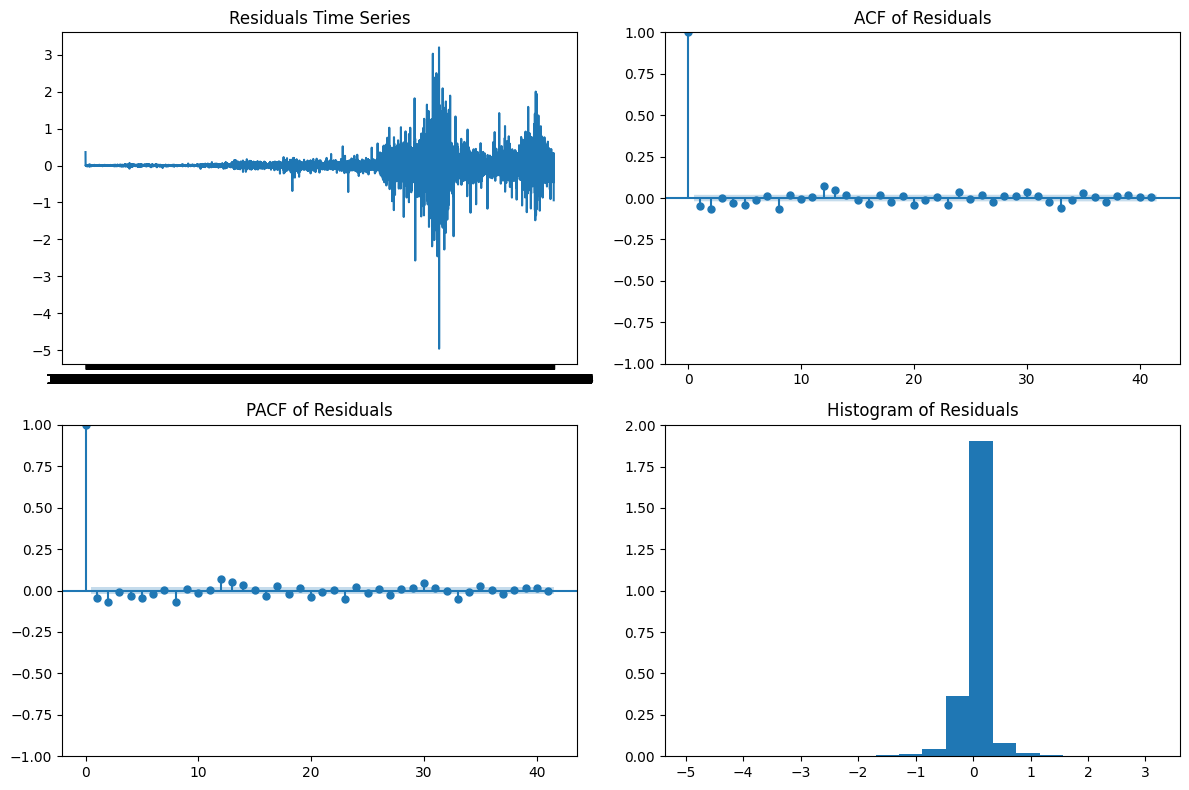

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf





residuals = model_fit.resid


plt.figure(figsize=(12, 8))


plt.subplot(221)
plt.plot(residuals)
plt.title('Residuals Time Series')


plt.subplot(222)
plot_acf(residuals, ax=plt.gca(), title='ACF of Residuals')


plt.subplot(223)
plot_pacf(residuals, ax=plt.gca(), title='PACF of Residuals')


plt.subplot(224)
plt.hist(residuals, bins=20, density=True)
plt.title('Histogram of Residuals')
plt.tight_layout()

plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

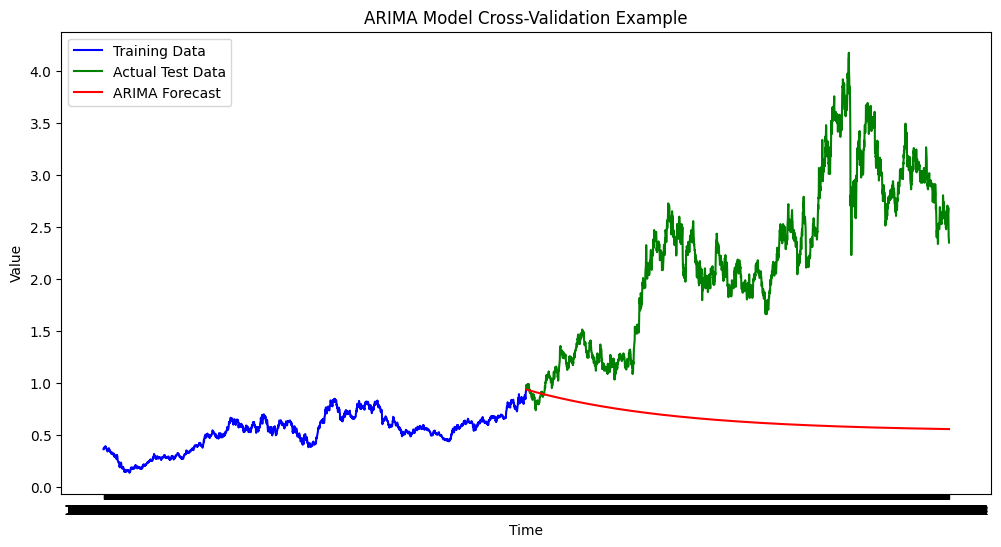

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

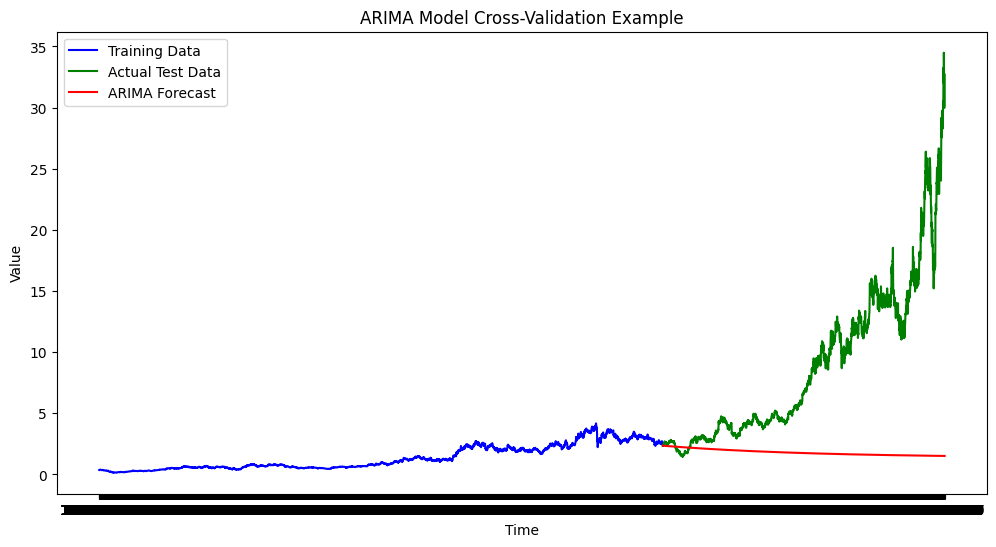

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

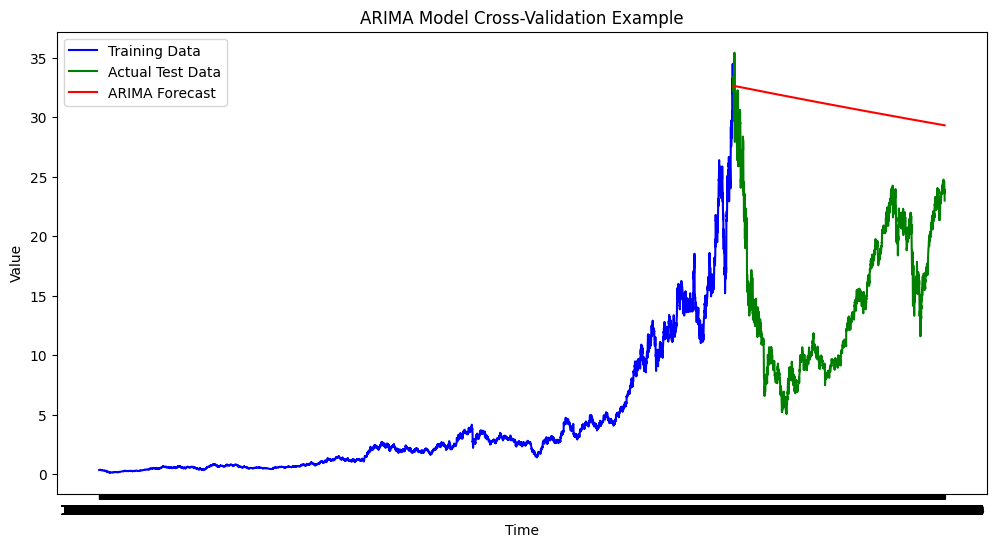

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

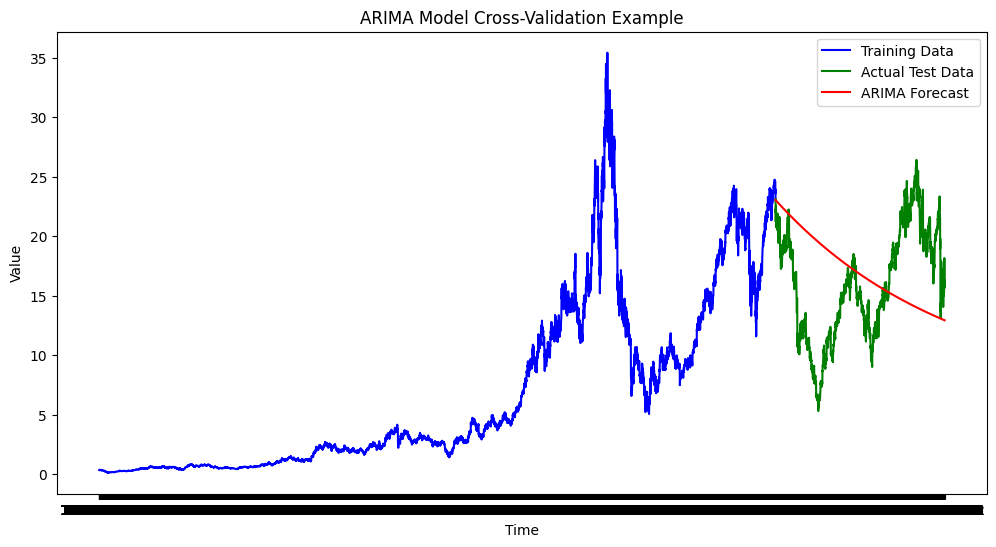

Mean MSE: 109.61841245997766


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error


n_splits = 4


tscv = TimeSeriesSplit(n_splits=n_splits)


p, d, q = 1, 0, 1


mse_scores = []

for f_index in range(0,len(list(tscv.split(close_df)))):
  fold_index = f_index
  train_index, test_index = list(tscv.split(close_df))[fold_index]
  train_data = close_df.iloc[train_index]
  test_data = close_df.iloc[test_index]

  model = ARIMA(train_data, order=(p, d, q))
  model_fit = model.fit()
  forecast = model_fit.forecast(steps=len(test_data))

  mse = mean_squared_error(test_data, forecast)
  mse_scores.append(mse)

  plt.figure(figsize=(12, 6))
  plt.plot(train_data.index, train_data.values, label="Training Data", color="blue")
  plt.plot(test_data.index, test_data.values, label="Actual Test Data", color="green")
  plt.plot(test_data.index, forecast, label="ARIMA Forecast", color="red")
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.title("ARIMA Model Cross-Validation Example")
  plt.legend()
  plt.show()
mean_mse = np.mean(mse_scores)


print(f"Mean MSE: {mean_mse}")


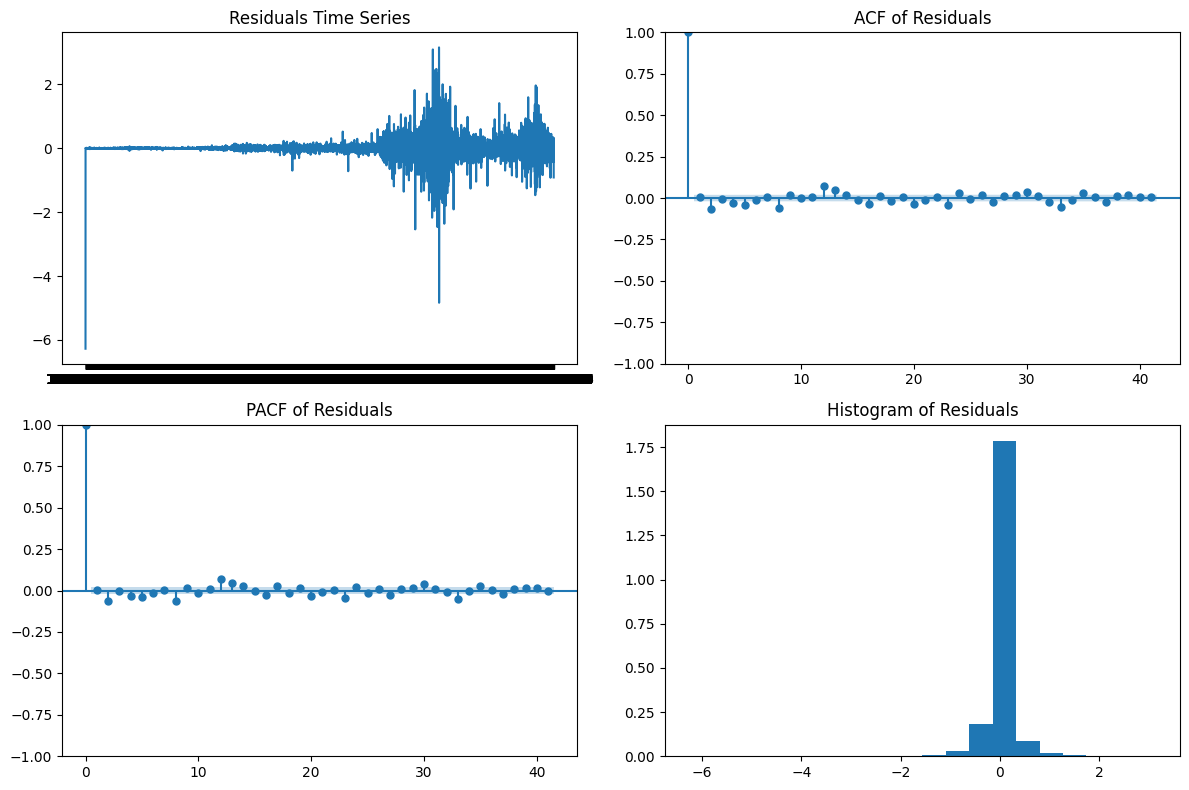

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

residuals = model_fit.resid


plt.figure(figsize=(12, 8))


plt.subplot(221)
plt.plot(residuals)
plt.title('Residuals Time Series')


plt.subplot(222)
plot_acf(residuals, ax=plt.gca(), title='ACF of Residuals')


plt.subplot(223)
plot_pacf(residuals, ax=plt.gca(), title='PACF of Residuals')


plt.subplot(224)
plt.hist(residuals, bins=20, density=True)
plt.title('Histogram of Residuals')
plt.tight_layout()

plt.show()

Streaming output truncated to the last 5000 lines.
dtype: float64
10227    20.55443
dtype: float64
10228    20.735555
dtype: float64
10229    21.216473
dtype: float64
10230    21.4865
dtype: float64
10231    21.533265
dtype: float64
10232    21.006912
dtype: float64
10233    21.188653
dtype: float64
10234    21.168616
dtype: float64
10235    20.678089
dtype: float64
10236    20.909238
dtype: float64
10237    20.956505
dtype: float64
10238    21.139957
dtype: float64
10239    21.581717
dtype: float64
10240    21.412695
dtype: float64
10241    21.091688
dtype: float64
10242    20.916162
dtype: float64
10243    21.565996
dtype: float64
10244    21.512009
dtype: float64
10245    21.252423
dtype: float64
10246    21.058029
dtype: float64
10247    21.02741
dtype: float64
10248    19.425087
dtype: float64
10249    19.229142
dtype: float64
10250    18.547887
dtype: float64
10251    18.24208
dtype: float64
10252    18.363163
dtype: float64
10253    18.412981
dtype: float64
10254    18.532033
dt

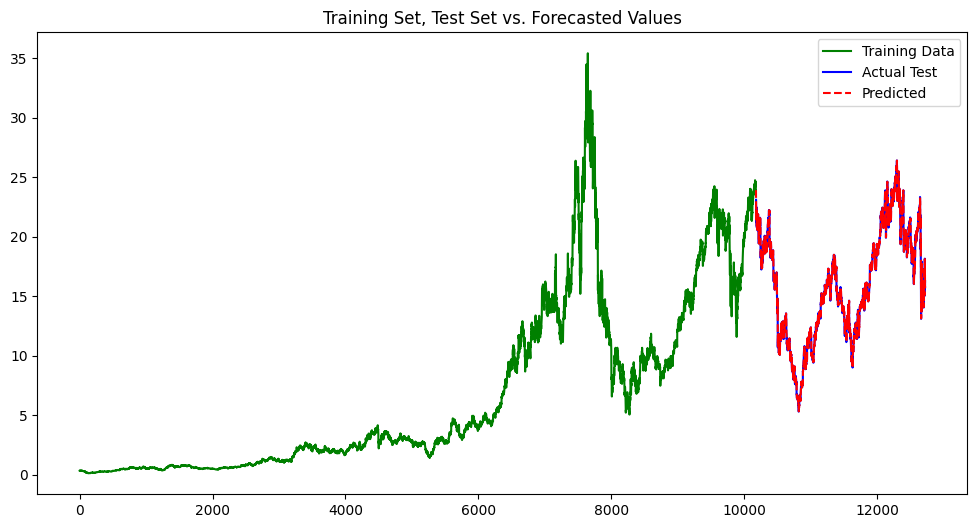

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


df.reset_index(drop=True, inplace=True)




p = 1
d = 1
q = 0

n_steps = 1


train_size = int(len(df) * 0.80)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

predictions = []


for i in range(0, len(test_data), n_steps):
    train_subset = df.iloc[:train_size + i]
    model = ARIMA(train_subset['close'], order=(p, d, q))
    results = model.fit()
    forecast = results.forecast(steps=n_steps)
    predictions.extend(forecast)
    print(forecast)


predictions = predictions[:len(test_data)]




mse = mean_squared_error(test_data['close'].values[:len(predictions)], predictions)
print(f"Mean Squared Error (MSE): {mse:.2f}")


plt.figure(figsize=(12, 6))


plt.plot(df['close'].iloc[:train_size].values, label="Training Data", color='green')


plt.plot(np.arange(train_size, train_size + len(predictions)), test_data['close'].values, label="Actual Test", color='blue')


plt.plot(np.arange(train_size, train_size + len(predictions)), predictions, label="Predicted", color='red', linestyle='dashed')

plt.title("Training Set, Test Set vs. Forecasted Values")
plt.legend()
plt.show()


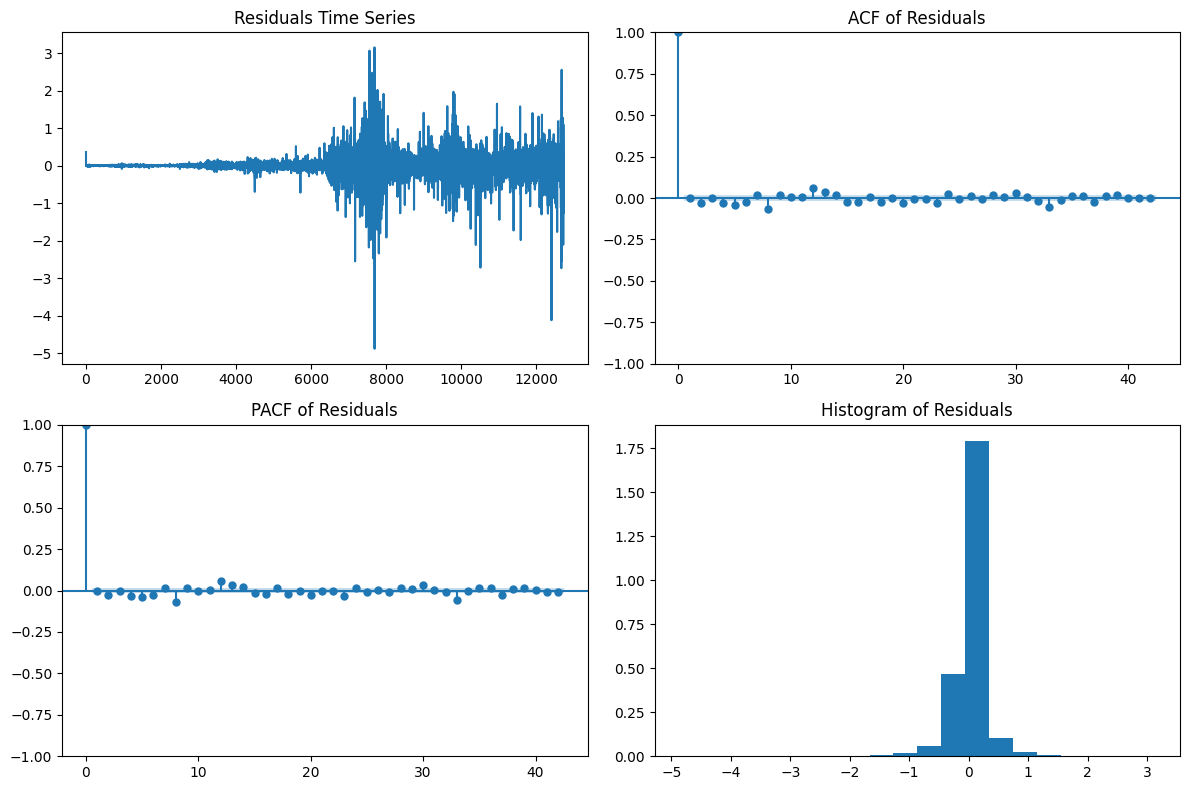

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf





residuals = results.resid


plt.figure(figsize=(12, 8))


plt.subplot(221)
plt.plot(residuals)
plt.title('Residuals Time Series')


plt.subplot(222)
plot_acf(residuals, ax=plt.gca(), title='ACF of Residuals')


plt.subplot(223)
plot_pacf(residuals, ax=plt.gca(), title='PACF of Residuals')


plt.subplot(224)
plt.hist(residuals, bins=20, density=True)
plt.title('Histogram of Residuals')
plt.tight_layout()

plt.show()


10180    23.921703
10181    23.922429
10182    23.922396
10183    23.922397
10184    23.922397
10185    23.922397
Name: predicted_mean, dtype: float64
10186    22.003753
10187    22.003058
10188    22.003091
10189    22.003089
10190    22.003089
10191    22.003089
Name: predicted_mean, dtype: float64
10192    21.339687
10193    21.339903
10194    21.339893
10195    21.339893
10196    21.339893
10197    21.339893
Name: predicted_mean, dtype: float64
10198    21.290306
10199    21.291590
10200    21.291528
10201    21.291531
10202    21.291531
10203    21.291531
Name: predicted_mean, dtype: float64
10204    20.562661
10205    20.561809
10206    20.561850
10207    20.561848
10208    20.561848
10209    20.561848
Name: predicted_mean, dtype: float64
10210    21.765100
10211    21.766270
10212    21.766214
10213    21.766216
10214    21.766216
10215    21.766216
Name: predicted_mean, dtype: float64
10216    21.291647
10217    21.291774
10218    21.291767
10219    21.291768
10220    21.291768

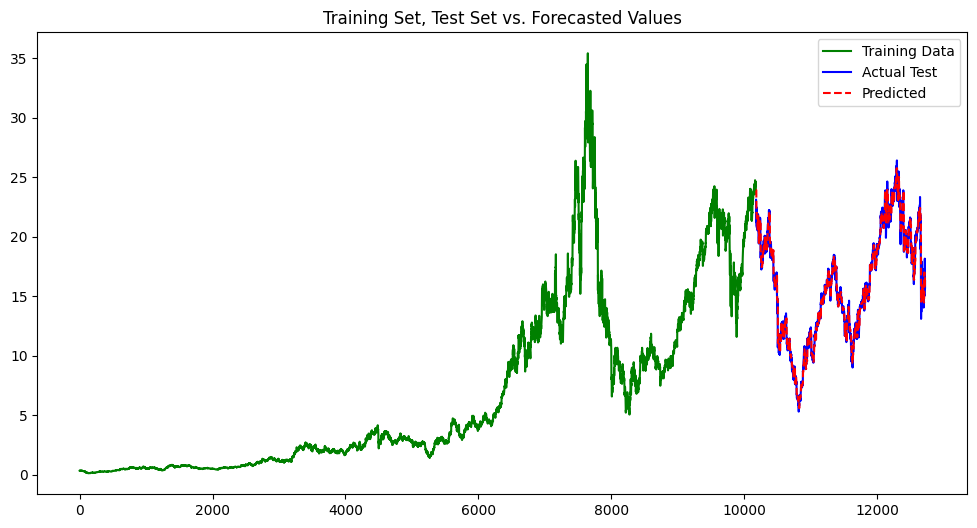

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


df.reset_index(drop=True, inplace=True)




p = 1
d = 1
q = 0


n_steps = 6


train_size = int(len(df) * 0.80)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

predictions = []


for i in range(0, len(test_data), n_steps):
    train_subset = df.iloc[:train_size + i]
    model = ARIMA(train_subset['close'], order=(p, d, q))
    results = model.fit()
    forecast = results.forecast(steps=n_steps)
    predictions.extend(forecast)
    print(forecast)


predictions = predictions[:len(test_data)]

mse = mean_squared_error(test_data['close'].values[:len(predictions)], predictions)
print(f"Mean Squared Error (MSE): {mse:.2f}")


plt.figure(figsize=(12, 6))


plt.plot(df['close'].iloc[:train_size].values, label="Training Data", color='green')


plt.plot(np.arange(train_size, train_size + len(predictions)), test_data['close'].values, label="Actual Test", color='blue')


plt.plot(np.arange(train_size, train_size + len(predictions)), predictions, label="Predicted", color='red', linestyle='dashed')

plt.title("Training Set, Test Set vs. Forecasted Values")
plt.legend()
plt.show()


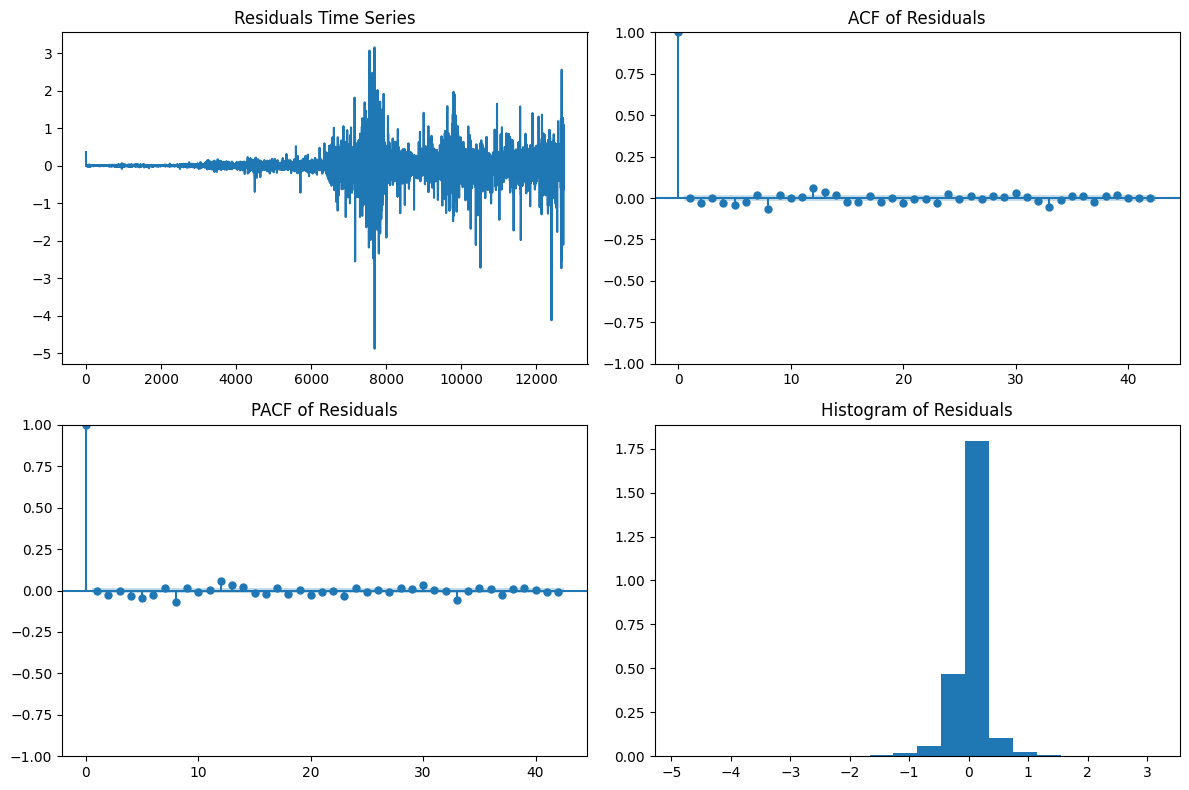

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf





residuals = results.resid


plt.figure(figsize=(12, 8))


plt.subplot(221)
plt.plot(residuals)
plt.title('Residuals Time Series')

plt.subplot(222)
plot_acf(residuals, ax=plt.gca(), title='ACF of Residuals')


plt.subplot(223)
plot_pacf(residuals, ax=plt.gca(), title='PACF of Residuals')


plt.subplot(224)
plt.hist(residuals, bins=20, density=True)
plt.title('Histogram of Residuals')
plt.tight_layout()

plt.show()